In [1]:
%run EUVIP_1_defaults.ipynb

Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213]
Range of angles (in degrees):  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
Final sparseness in the representation = 0.0026041666666666665
Final sparseness in the pyramid = 0.375


In [2]:
%cd -q ../test/

## DropLets as a sparse MotionCloud

From the previous notebooks, images have *locally* a sparse distribution of coefficients. This seems to be also true spatially, some places are void, while others are denser. Looked individually though, they will all have the same power-law. 

One way of mimicking this is to create sparse [http://motionclouds.invibe.net](motion clouds). In this [http://invibe.net/LaurentPerrinet/Publications/Ravello16droplets](paper), we develop a generic algorithm: generate a sparse matrix, then convolve it with the texton. Coefficients are locally drawn from a power-law distribution.


[ 0.      0.0001  0.0022  0.0473  1.    ]


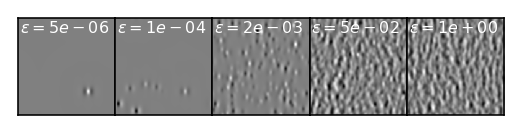

In [3]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt

# PARAMETERS
seed = 2042
np.random.seed(seed=seed)
N_sparse = 5
sparse_base = 2.e5
sparseness =  np.logspace(-1, 0, N_sparse, base=sparse_base, endpoint=True)
print(sparseness)

# TEXTON
N_X, N_Y, N_frame = 256, 256, 1
fx, fy, ft = mc.get_grids(N_X, N_Y, 1)
mc_i = mc.envelope_gabor(fx, fy, ft, sf_0=0.05, B_sf=0.025, B_theta=np.inf)

values = np.random.randn(N_X, N_Y, N_frame)
chance = np.argsort(-np.abs(values.ravel()))
chance = np.array(chance, dtype=np.float)
chance /= chance.max()
chance = chance.reshape((N_X, N_Y, N_frame))

fig, axs = plt.subplots(1, N_sparse, figsize=(fig_width, fig_width/N_sparse))
for i_ax, l0_norm in enumerate(sparseness):

    threshold = 1 - l0_norm
    mask = np.zeros_like(chance)
    mask[chance > threshold] = 1.
    
    im = 2*mc.rectif(mc.random_cloud(mc_i, events=mask*values))-1
                
    axs[i_ax].imshow(im[:, :, 0], vmin=-1, vmax=1, cmap=plt.gray())
    axs[i_ax].text(4, 40, r'$\epsilon=%.0e$' % l0_norm, color='white', fontsize=8)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)
mp.savefig(fig,  experiment + '_droplets');